In [ ]:
import mplfinance as mpf
import pandas as pd
import matplotlib as plt
import numpy as np
import yfinance as yf

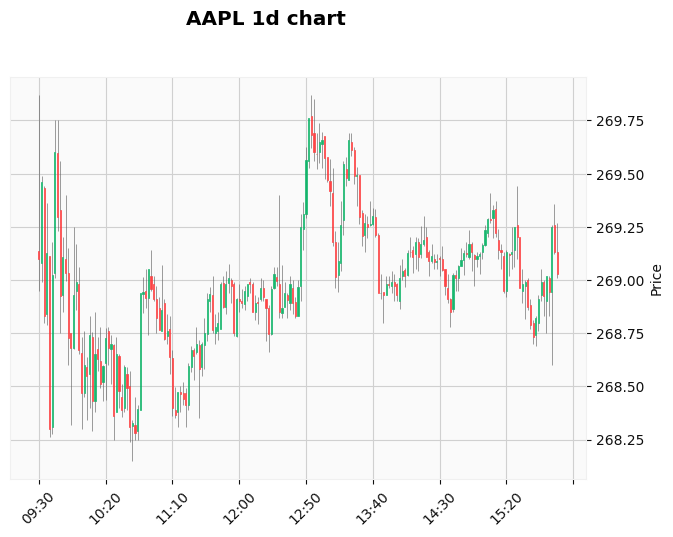

In [ ]:
stock = 'AMZN'
period = '1d'
tic = yf.Ticker(stock)
stockDataFrame = tic.history(period = period, interval='5m')
title = f'{stock} {period} chart'


# mpf.plot(stockDataFrame, type='candle', style='yahoo', title = title)

In [ ]:
#1 depicts bullish candle and 0 represents a bearish candle
stockDataFrame['CandleHeight']  = stockDataFrame['Close']-stockDataFrame['Open']
stockDataFrame['WickToWick']    = stockDataFrame['High']-stockDataFrame['Low']
stockDataFrame['Trend']         = stockDataFrame['CandleHeight'].apply(lambda x: 1 if x<0 else 0)

# stockDataFrame.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CandleHeight,WickToWick,Trend
Datetime,,,,,,,,,,
2025-10-28 09:30:00-04:00,269.135010,269.869995,268.950104,269.100006,2774166,0.0,0.0,-0.035004,0.919891,1
2025-10-28 09:32:00-04:00,269.079987,269.489990,268.989990,269.459290,538319,0.0,0.0,0.379303,0.500000,0
2025-10-28 09:34:00-04:00,269.429993,269.440002,268.799988,268.829987,493740,0.0,0.0,-0.600006,0.640015,1


In [ ]:
#Lets write some code to find the upper and lower wick height
#The logic is that in green candles(1) the upper wick height is high - close, and lower wick is open-low, whereas in the
#red candles, this logic is reversed, upper wick is high-open, and lower wick is close-low
def UpperWickCalculator(Open,Close,High,Trend):
    if Trend == 0:
        return High-Open
    elif Trend == 1:
        return High-Close
    
def LowerWickCalculator(Open,Close,Low,Trend):
    if Trend == 0:
        return Close-Low
    elif Trend ==1:
        return Open-Low

def TotalWick(LowerWick,UpperWick):
    return LowerWick+UpperWick

# stockDataFrame['UpperWick'] = stockDataFrame[['Open','Close','High','Low','Trend']].apply()
stockDataFrame['UpperWick'] = np.vectorize(UpperWickCalculator)(stockDataFrame['Open'],stockDataFrame['Close'],stockDataFrame['High'],stockDataFrame['Trend'])
stockDataFrame['LowerWick'] = np.vectorize(LowerWickCalculator)(stockDataFrame['Open'],stockDataFrame['Close'],stockDataFrame['Low'],stockDataFrame['Trend'])
stockDataFrame['TotalWick'] = np.vectorize(TotalWick)(stockDataFrame['LowerWick'],stockDataFrame['UpperWick'])
# stockDataFrame.head(3)




,Open,High,Low,Close,Volume,Dividends,Stock Splits,CandleHeight,WickToWick,Trend,UpperWick,LowerWick,TotalWick
Datetime,,,,,,,,,,,,,
2025-10-28 09:30:00-04:00,269.135010,269.869995,268.950104,269.100006,2774166,0.0,0.0,-0.035004,0.919891,1,0.769989,0.184906,0.954895
2025-10-28 09:32:00-04:00,269.079987,269.489990,268.989990,269.459290,538319,0.0,0.0,0.379303,0.500000,0,0.410004,0.469299,0.879303
2025-10-28 09:34:00-04:00,269.429993,269.440002,268.799988,268.829987,493740,0.0,0.0,-0.600006,0.640015,1,0.610016,0.630005,1.240021


In [ ]:
#Now lets write some code to figure out whether it is doji

#I am trying with a 15 times multiplier, as in the wick must be 15 times


def is_doji(total_wick,candle_height):
    candle_multiplier = 15
    if total_wick >= abs(candle_height)*candle_multiplier:
        return True
    else:
        return False

def is_marubozo(candle_height,wick_to_wick):
    if abs(candle_height) == wick_to_wick:
        return True
    else:
        return False

stockDataFrame['is_doji']       = np.vectorize(is_doji)(stockDataFrame['TotalWick'],stockDataFrame['CandleHeight'])
stockDataFrame['is_marubozo']   = np.vectorize(is_marubozo)(stockDataFrame['CandleHeight'],stockDataFrame['WickToWick'])




In [ ]:
apds=[]

if stockDataFrame['is_doji'].any():
    ap1 = mpf.make_addplot(stockDataFrame['is_doji'].where(stockDataFrame['is_doji']), color='orange', width=1, type='scatter',markersize=500, marker='x', label='doji')
    apds.append(ap1)

if stockDataFrame['is_marubozo'].any():
    ap2 = mpf.make_addplot(stockDataFrame['is_marubozo'].where(stockDataFrame['is_marubozo']), color='orange', width=1, type='scatter',markersize=500, marker='+', label='marubozo')
    apds.append(ap2)


ap3 = mpf.make_addplot(stockDataFrame['Close'].rolling(window=20).mean(), color = 'black', width =1, type ='line')
apds.append(ap3)

In [ ]:
# stockDataFrame.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CandleHeight,WickToWick,Trend,UpperWick,LowerWick,TotalWick,is_doji,is_marubozo
Datetime,,,,,,,,,,,,,,,
2025-10-28 09:30:00-04:00,269.135010,269.869995,268.950104,269.100006,2774166,0.0,0.0,-0.035004,0.919891,1,0.769989,0.184906,0.954895,True,False
2025-10-28 09:32:00-04:00,269.079987,269.489990,268.989990,269.459290,538319,0.0,0.0,0.379303,0.500000,0,0.410004,0.469299,0.879303,False,False
2025-10-28 09:34:00-04:00,269.429993,269.440002,268.799988,268.829987,493740,0.0,0.0,-0.600006,0.640015,1,0.610016,0.630005,1.240021,False,False


In [ ]:
engulf = stockDataFrame[['Open','Close','Trend','CandleHeight']].copy()
engulf['Open_prev'] = engulf['Open'].shift(1)
engulf['Close_prev'] = engulf['Close'].shift(1)
engulf['Trend_prev'] = engulf['Trend'].shift(1)

# engulf.head(11)


,Open,Close,Trend,CandleHeight,Open_prev,Close_prev,Trend_prev
Datetime,,,,,,,
2025-10-28 09:30:00-04:00,269.135010,269.100006,1,-0.035004,NaN,NaN,NaN
2025-10-28 09:32:00-04:00,269.079987,269.459290,0,0.379303,269.135010,269.100006,1.0
2025-10-28 09:34:00-04:00,269.429993,268.829987,1,-0.600006,269.079987,269.459290,0.0
2025-10-28 09:36:00-04:00,268.839996,269.125000,0,0.285004,269.429993,268.829987,1.0
2025-10-28 09:38:00-04:00,269.114990,268.298492,1,-0.816498,268.839996,269.125000,0.0
2025-10-28 09:40:00-04:00,268.310699,269.024994,0,0.714294,269.114990,268.298492,1.0
2025-10-28 09:42:00-04:00,269.035004,269.600006,0,0.565002,268.310699,269.024994,0.0
2025-10-28 09:44:00-04:00,269.596985,269.294495,1,-0.302490,269.035004,269.600006,0.0
2025-10-28 09:46:00-04:00,269.329987,268.922699,1,-0.407288,269.596985,269.294495,1.0


d:\Programming\College_python\Project\finenv\Lib\site-packages\numpy\lib\_function_base_impl.py:2625: RuntimeWarning: invalid value encountered in is_bearEng (vectorized)
  outputs = ufunc(*args, out=...)


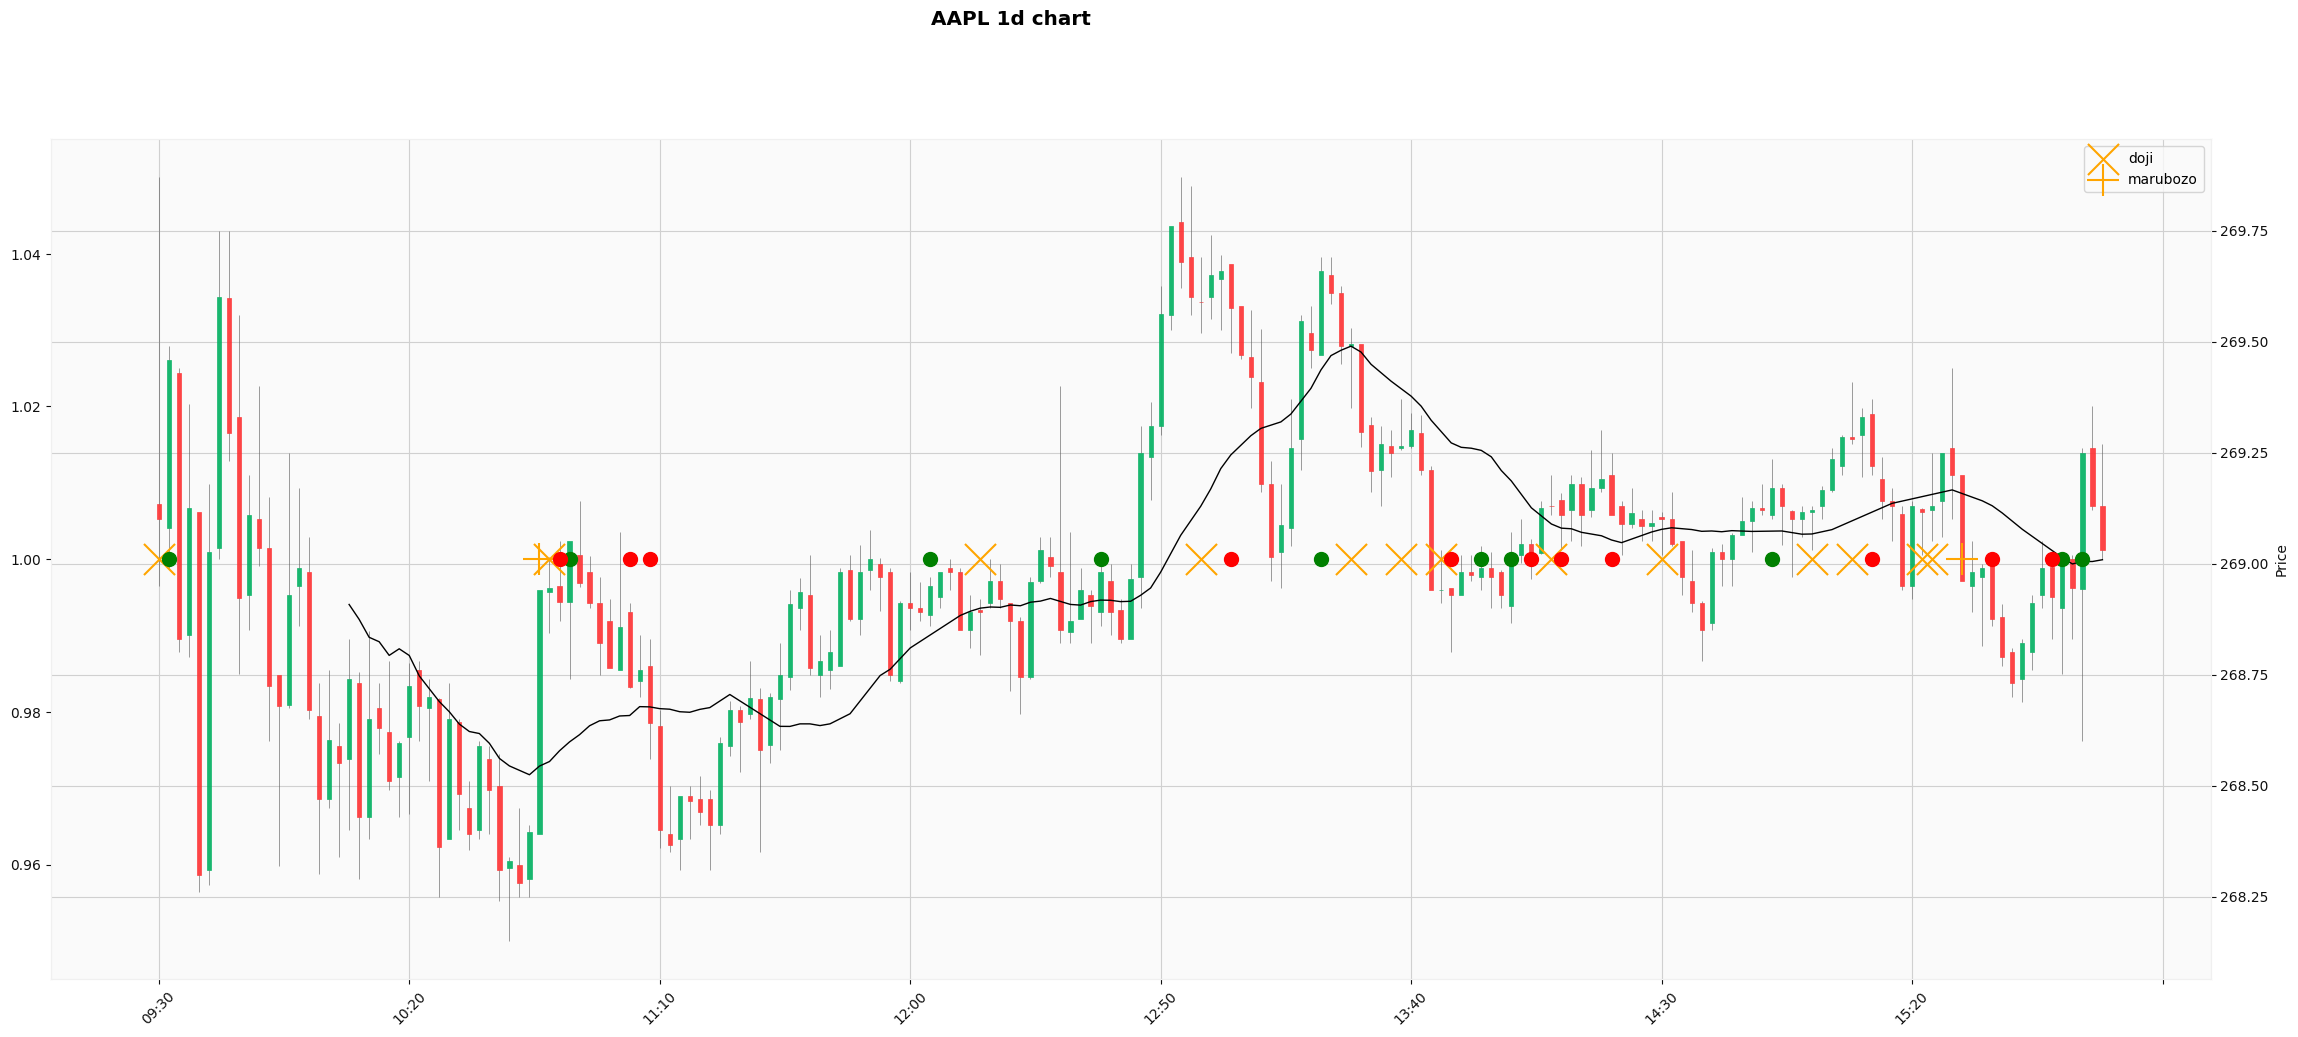

In [ ]:
#Now Let's Write some Code for finding if the candle is bullish/bearish engulfing
def is_bullEng(Open,Close,Open_prev,Close_prev,Trend,Trend_prev):
    if Trend != Trend_prev and Trend == 0:
        if(Close_prev > Open) and (Close > Open_prev):
            return True
    
    return False

def is_bearEng(Open,Close,Open_prev,Close_prev,Trend,Trend_prev):
    if Trend != Trend_prev and Trend == 1:
        if(Close_prev < Open) and (Close < Open_prev):
            return True
    
    return False

    
engulf['is_bullEng'] = np.vectorize(is_bullEng)(engulf['Open'],engulf['Close'],engulf['Open_prev'],engulf['Close_prev'],engulf['Trend'],engulf['Trend_prev'])
engulf['is_bearEng'] = np.vectorize(is_bearEng)(engulf['Open'],engulf['Close'],engulf['Open_prev'],engulf['Close_prev'],engulf['Trend'],engulf['Trend_prev'])


if engulf['is_bullEng'].any():
    ap4 = mpf.make_addplot(engulf['is_bullEng'].where(engulf['is_bullEng']), color='green', width=1, type='scatter',markersize=100, marker='o')
    apds.append(ap4)
if engulf['is_bearEng'].any():
    ap5 = mpf.make_addplot(engulf['is_bearEng'].where(engulf['is_bearEng']), color='red', width=1, type='scatter',markersize=100, marker='o')
    apds.append(ap5)


# mpf.plot(stockDataFrame, type = 'candle', style = 'yahoo', addplot = apds, title = title, figsize = (30,12))



    
